In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk import LancasterStemmer
from nltk import PorterStemmer
import numpy as np
import pandas as pd

In [3]:
X = pd.read_csv("wines_tries.csv",delimiter=";", decimal=",")
X.dtypes
X.head(10)

,country,description,designation,points,price,province,taster_name,title,variety,winery
0,US,Soft; supple plum envelopes an oaky structure ...,Mountain Cuvee,87,19.0,California,Virginie Boone,Kirkland Signature 2011 Mountain Cuvee Caberne...,Cabernet Sauvignon,Kirkland Signature
1,US,Slightly reduced; this wine offers a chalky; t...,NaN,87,34.0,California,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
2,Italy,This concentrated Cabernet offers aromas of cu...,Missoni,86,21.0,Sicily & Sardinia,NaN,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto
3,US,Syrupy and dense; this wine is jammy in plum a...,Estate,86,100.0,California,Virginie Boone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi
4,US,Big oak defines this robustly dense and extrac...,Old Vine,86,40.0,California,Virginie Boone,Eco Terreno 2013 Old Vine Cabernet Sauvignon (...,Cabernet Sauvignon,Eco Terreno
5,US,Juicy plum; raspberry and pencil lead lead the...,Bella Vetta Vineyard,86,75.0,California,Virginie Boone,Hindsight 2013 Bella Vetta Vineyard Cabernet S...,Cabernet Sauvignon,Hindsight
6,US,This 100% varietal wine opens in a heady aroma...,Wolff Vineyard,87,85.0,California,Virginie Boone,Piña 2013 Wolff Vineyard Cabernet Sauvignon (Y...,Cabernet Sauvignon,Piña
7,US,This sophisticated wine is mostly Cabernet Sau...,NaN,92,45.0,California,NaN,Silverado 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Silverado
8,South Africa,Etienne Le Riche is a total Cabernet specialis...,Cabernet Sauvignon Reserve,91,45.0,Stellenbosch,Roger Voss,Le Riche 2003 Cabernet Sauvignon Reserve Caber...,Cabernet Sauvignon,Le Riche
9,South Africa,A Cabernet-dominated (98%) wine; which boasts ...,Grand Reserve,91,30.0,Simonsberg-Stellenbosch,Roger Voss,Delheim 2001 Grand Reserve Cabernet Sauvignon ...,Cabernet Sauvignon,Delheim


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72631 entries, 0 to 72630
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      72605 non-null  object
 1   description  72631 non-null  object
 2   designation  51164 non-null  object
 3   points       72631 non-null  int64 
 4   price        69697 non-null  object
 5   province     72605 non-null  object
 6   taster_name  56476 non-null  object
 7   title        72631 non-null  object
 8   variety      72630 non-null  object
 9   winery       72631 non-null  object
dtypes: int64(1), object(9)
memory usage: 5.5+ MB


In [5]:
X[X['description'].duplicated(keep = False)].sort_values('description').head(8)

,country,description,designation,points,price,province,taster_name,title,variety,winery
22164,US,100% Malbec; it's redolent with dark plums; wi...,NaN,87,20.0,Washington,Sean P. Sullivan,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
22547,US,100% Malbec; it's redolent with dark plums; wi...,NaN,87,20.0,Washington,Sean P. Sullivan,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
57582,US,100% Sangiovese; this pale pink wine has notes...,Meadow,88,18.0,Washington,Sean P. Sullivan,Ross Andrew 2013 Meadow Rose (Columbia Valley ...,Rose,Ross Andrew
56271,US,100% Sangiovese; this pale pink wine has notes...,Meadow,88,18.0,Washington,Sean P. Sullivan,Ross Andrew 2013 Meadow Rose (Columbia Valley ...,Rose,Ross Andrew
34798,US,A 100% varietal wine fermented in stainless st...,Woods Vineyard Rose of,88,29.0,California,Virginie Boone,Ousterhout 2015 Woods Vineyard Rose of Pinot N...,Pinot Noir,Ousterhout
32562,US,A 100% varietal wine fermented in stainless st...,Woods Vineyard Rose of,88,29.0,California,Virginie Boone,Ousterhout 2015 Woods Vineyard Rose of Pinot N...,Pinot Noir,Ousterhout
70262,US,A 100% varietal wine from near the town of Gle...,Estate Grown,90,32.0,California,Virginie Boone,Dunbar 2013 Estate Grown Zinfandel (Sonoma Val...,Zinfandel,Dunbar
70050,US,A 100% varietal wine from near the town of Gle...,Estate Grown,90,32.0,California,Virginie Boone,Dunbar 2013 Estate Grown Zinfandel (Sonoma Val...,Zinfandel,Dunbar


In [6]:
X.info()
print('Nombre total de Nan = ', X.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72631 entries, 0 to 72630
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      72605 non-null  object
 1   description  72631 non-null  object
 2   designation  51164 non-null  object
 3   points       72631 non-null  int64 
 4   price        69697 non-null  object
 5   province     72605 non-null  object
 6   taster_name  56476 non-null  object
 7   title        72631 non-null  object
 8   variety      72630 non-null  object
 9   winery       72631 non-null  object
dtypes: int64(1), object(9)
memory usage: 5.5+ MB
Nombre total de Nan =  40609


In [7]:
X1 = X.drop_duplicates('description')
X1.shape

(67073, 10)

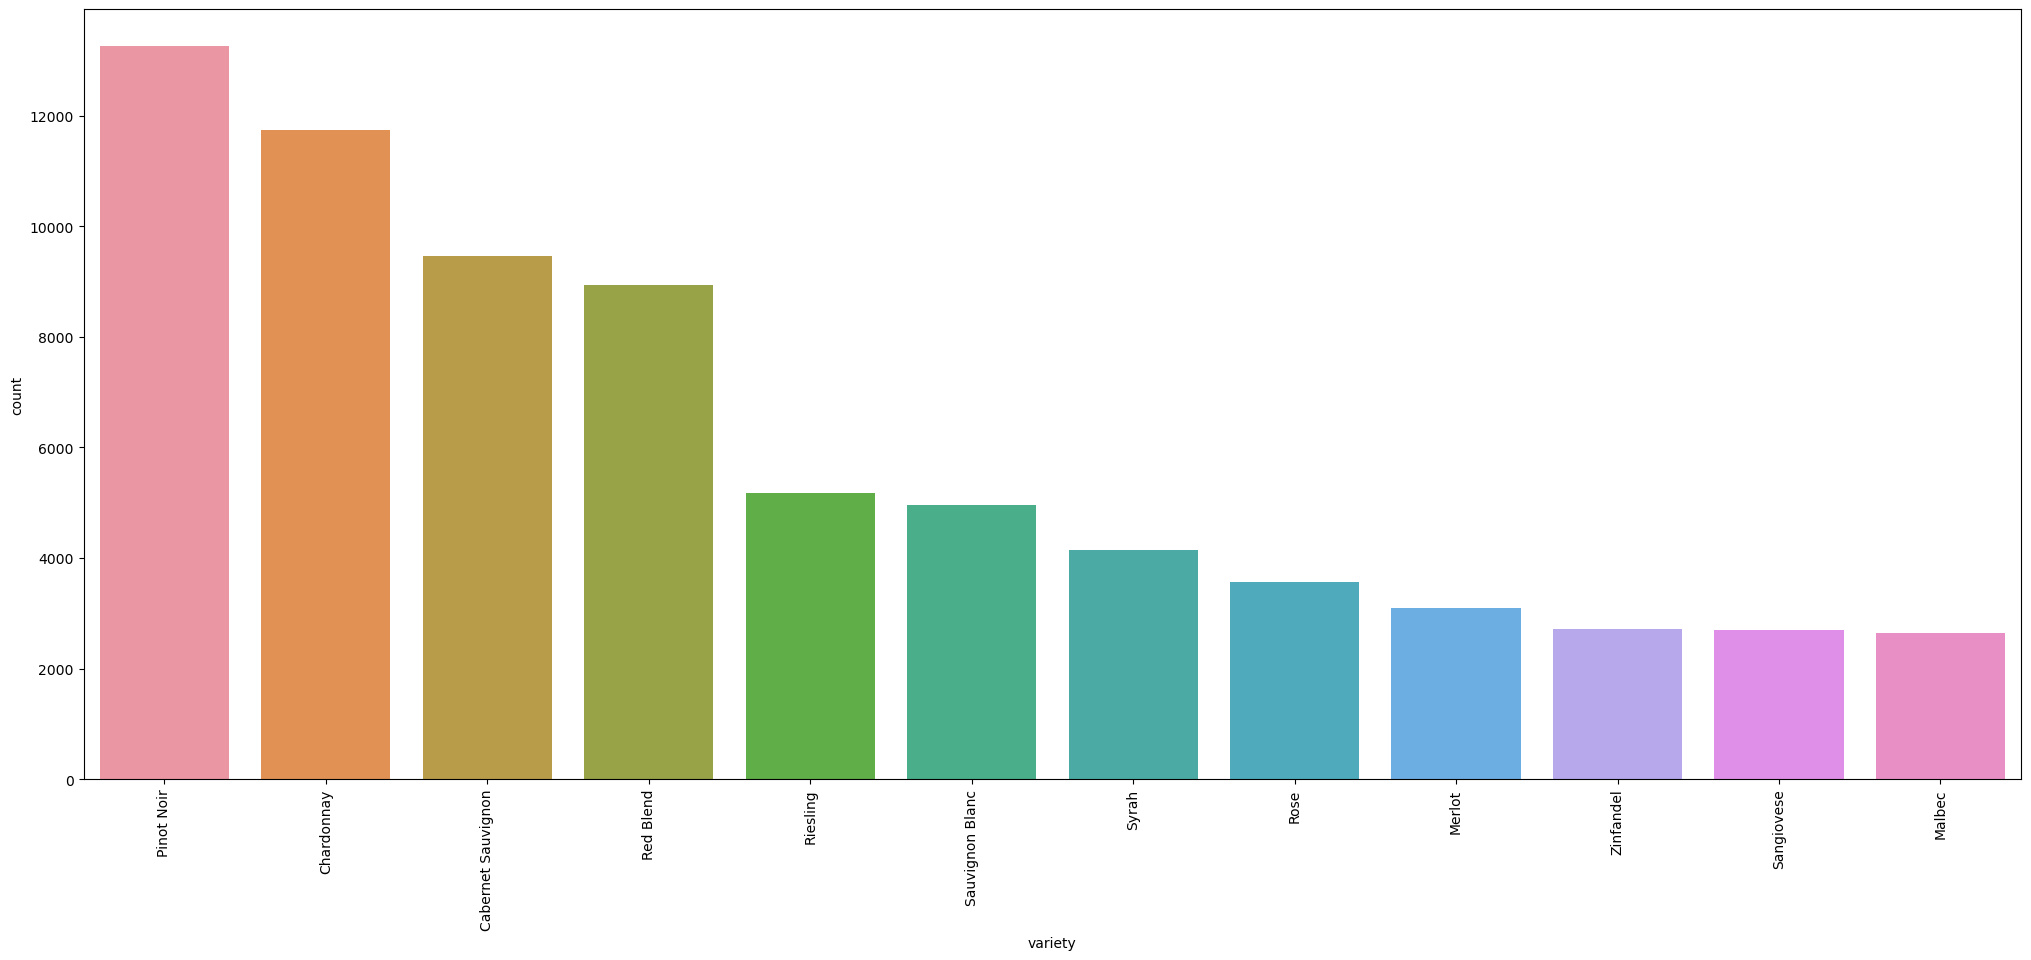

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

variety = X.groupby('variety').filter(lambda x: len(x) > 1500)
varieties = variety['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [9]:
Rose=X1[(X1["variety"] == 'Rose') & (X1["country"] == 'France')]
Rose

,country,description,designation,points,price,province,taster_name,title,variety,winery
54342,France,An easy and inviting selection; there's a ment...,NaN,83,16.0,Languedoc-Roussillon,Lauren Buzzeo,Château Notre Dame du Quatourze 2015 Rose (Lan...,Rose,Château Notre Dame du Quatourze
54343,France,The wine is earthy and somewhat rustic. There ...,NaN,82,11.0,Provence,Roger Voss,Memoires 2015 Rose (Coteaux Varois en Provence),Rose,Memoires
54345,France,This is a big; spicy wine; with very ripe flav...,L'Esprit de Provence,87,20.0,Provence,Roger Voss,Domaine du Grand Cros 2011 L'Esprit de Provenc...,Rose,Domaine du Grand Cros
54347,France,Coming from a remote estate on the edge of the...,NaN,93,20.0,Provence,Roger Voss,Château Vignelaure 2015 Rose (Coteaux d'Aix-en...,Rose,Château Vignelaure
54348,France,Named after the Negrel family; owners of the e...,Mas Negrel Cadenet,93,40.0,Provence,Roger Voss,Mas de Cadenet 2015 Mas Negrel Cadenet Rose (C...,Rose,Mas de Cadenet
...,...,...,...,...,...,...,...,...,...,...
57883,France,This is a taut wine that's full of zest; acidi...,L'Alycastre,87,14.0,Provence,Roger Voss,Domaine de la Courtade 2011 L'Alycastre Rose (...,Rose,Domaine de la Courtade
57892,France,This is pretty pale for a Tavel; with a copper...,NaN,90,24.0,Rhône Valley,Joe Czerwinski,Prieure de Montezargues 2014 Tavel,Rose,Prieure de Montezargues
57897,France,This is a barely pink rose; perfect to reflect...,Les Voiles de Saint-Tropez,87,NaN,Provence,Roger Voss,Les Maîtres Vignerons de la Presqu'île de Sain...,Rose,Les Maîtres Vignerons de la Presqu'île de Sain...
57898,France,Soft and ripe; it is gently fruity with light ...,Cuvee G,87,NaN,Provence,Roger Voss,Les Vignobles Gueissard 2013 Cuvee G Rose (Côt...,Rose,Les Vignobles Gueissard


In [10]:
Rose=X[(X["variety"] == 'Rose') & (X["country"] == 'France')]
Rose

,country,description,designation,points,price,province,taster_name,title,variety,winery
54342,France,An easy and inviting selection; there's a ment...,NaN,83,16.0,Languedoc-Roussillon,Lauren Buzzeo,Château Notre Dame du Quatourze 2015 Rose (Lan...,Rose,Château Notre Dame du Quatourze
54343,France,The wine is earthy and somewhat rustic. There ...,NaN,82,11.0,Provence,Roger Voss,Memoires 2015 Rose (Coteaux Varois en Provence),Rose,Memoires
54345,France,This is a big; spicy wine; with very ripe flav...,L'Esprit de Provence,87,20.0,Provence,Roger Voss,Domaine du Grand Cros 2011 L'Esprit de Provenc...,Rose,Domaine du Grand Cros
54347,France,Coming from a remote estate on the edge of the...,NaN,93,20.0,Provence,Roger Voss,Château Vignelaure 2015 Rose (Coteaux d'Aix-en...,Rose,Château Vignelaure
54348,France,Named after the Negrel family; owners of the e...,Mas Negrel Cadenet,93,40.0,Provence,Roger Voss,Mas de Cadenet 2015 Mas Negrel Cadenet Rose (C...,Rose,Mas de Cadenet
...,...,...,...,...,...,...,...,...,...,...
57892,France,This is pretty pale for a Tavel; with a copper...,NaN,90,24.0,Rhône Valley,Joe Czerwinski,Prieure de Montezargues 2014 Tavel,Rose,Prieure de Montezargues
57896,France,The palest pink grey in color; it is ripe and ...,Romance,87,14.0,Provence,Roger Voss,Château de Berne 2013 Romance Rose (Côtes de P...,Rose,Château de Berne
57897,France,This is a barely pink rose; perfect to reflect...,Les Voiles de Saint-Tropez,87,NaN,Provence,Roger Voss,Les Maîtres Vignerons de la Presqu'île de Sain...,Rose,Les Maîtres Vignerons de la Presqu'île de Sain...
57898,France,Soft and ripe; it is gently fruity with light ...,Cuvee G,87,NaN,Provence,Roger Voss,Les Vignobles Gueissard 2013 Cuvee G Rose (Côt...,Rose,Les Vignobles Gueissard


In [11]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [12]:
X1['description'] = X1['description'].astype("string")
X1['description']


C:\Users\njourdan\AppData\Local\Temp\ipykernel_37080\813905060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['description'] = X1['description'].astype("string")


0        Soft; supple plum envelopes an oaky structure ...
1        Slightly reduced; this wine offers a chalky; t...
2        This concentrated Cabernet offers aromas of cu...
3        Syrupy and dense; this wine is jammy in plum a...
4        Big oak defines this robustly dense and extrac...
                               ...                        
72624    From the Heideboden vineyard; this mineral; st...
72626    Crushed boysenberry is foremost on the nose an...
72627    This enormously gluggable wine is like an ode ...
72628    Quite possibly the first and only Washington Z...
72630    A chalky; dusty mouthfeel nicely balances this...
Name: description, Length: 67073, dtype: string

In [13]:
import nltk
from nltk.tokenize import word_tokenize

X1['description'].dropna(inplace=True)
tokens= X1['description'].apply(word_tokenize)
tokens

C:\Users\njourdan\AppData\Local\Temp\ipykernel_37080\1245190456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['description'].dropna(inplace=True)


0        [Soft, ;, supple, plum, envelopes, an, oaky, s...
1        [Slightly, reduced, ;, this, wine, offers, a, ...
2        [This, concentrated, Cabernet, offers, aromas,...
3        [Syrupy, and, dense, ;, this, wine, is, jammy,...
4        [Big, oak, defines, this, robustly, dense, and...
                               ...                        
72624    [From, the, Heideboden, vineyard, ;, this, min...
72626    [Crushed, boysenberry, is, foremost, on, the, ...
72627    [This, enormously, gluggable, wine, is, like, ...
72628    [Quite, possibly, the, first, and, only, Washi...
72630    [A, chalky, ;, dusty, mouthfeel, nicely, balan...
Name: description, Length: 67073, dtype: object

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data = pd.DataFrame(X1['description'])
data.columns = ["description"]

#Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['description_without_stopwords'] = data['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data


,description,description_without_stopwords
0,Soft; supple plum envelopes an oaky structure ...,Soft; supple plum envelopes oaky structure Cab...
1,Slightly reduced; this wine offers a chalky; t...,Slightly reduced; wine offers chalky; tannic b...
2,This concentrated Cabernet offers aromas of cu...,This concentrated Cabernet offers aromas cured...
3,Syrupy and dense; this wine is jammy in plum a...,Syrupy dense; wine jammy plum vanilla; indeter...
4,Big oak defines this robustly dense and extrac...,Big oak defines robustly dense extracted red; ...
...,...,...
72624,From the Heideboden vineyard; this mineral; st...,From Heideboden vineyard; mineral; structured ...
72626,Crushed boysenberry is foremost on the nose an...,Crushed boysenberry foremost nose palate; roun...
72627,This enormously gluggable wine is like an ode ...,This enormously gluggable wine like ode cherri...
72628,Quite possibly the first and only Washington Z...,Quite possibly first Washington Zweigelt; sort...


In [15]:
Xfin= data['description_without_stopwords']
Xfin

0        Soft; supple plum envelopes oaky structure Cab...
1        Slightly reduced; wine offers chalky; tannic b...
2        This concentrated Cabernet offers aromas cured...
3        Syrupy dense; wine jammy plum vanilla; indeter...
4        Big oak defines robustly dense extracted red; ...
                               ...                        
72624    From Heideboden vineyard; mineral; structured ...
72626    Crushed boysenberry foremost nose palate; roun...
72627    This enormously gluggable wine like ode cherri...
72628    Quite possibly first Washington Zweigelt; sort...
72630    A chalky; dusty mouthfeel nicely balances Peti...
Name: description_without_stopwords, Length: 67073, dtype: object

In [16]:
#desc = X1['description'].values
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Xfin)

word_features = vectorizer.get_feature_names_out()
word_features[1000:1100]


array(['allrounder', 'allspice', 'allude', 'allure', 'alluring',
       'alluringly', 'alluvial', 'alma', 'almaterra', 'almaviva',
       'almond', 'almondine', 'almonds', 'almondy', 'almost', 'almosty',
       'aloft', 'alone', 'along', 'alongside', 'alonside', 'aloof',
       'aloud', 'aloxe', 'alperegis', 'alpes', 'alpha', 'alphonse',
       'alpilles', 'alpine', 'alps', 'already', 'alright', 'alsace',
       'alsatian', 'also', 'alta', 'altamira', 'altamont', 'altamura',
       'altar', 'alter', 'alterations', 'alternate', 'alternately',
       'alternating', 'alternative', 'alternatively', 'alternatives',
       'although', 'altimus', 'altitude', 'altitudes', 'alto',
       'altocedro', 'altogether', 'altoids', 'altos', 'altrovino', 'alum',
       'alvaro', 'always', 'alzheimer', 'amabile', 'amador', 'amalfi',
       'amalgam', 'amalie', 'amaral', 'amarena', 'amaretto', 'amaro',
       'amarone', 'amarones', 'amass', 'amassing', 'amatriciana', 'amavi',
       'amaze', 'amazed', 'a

In [17]:
print("Nombre de mots sans StopWords")
len(word_features)

Nombre de mots sans StopWords


23902

In [35]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet') 

lemmatizer = WordNetLemmatizer()   
#an instance of Word Net Lemmatizer
lemmatized_words = [lemmatizer.lemmatize(word) for word in word_features] 

print(lemmatized_words[1000:1100])

['allrounder', 'allspice', 'allude', 'allure', 'alluring', 'alluringly', 'alluvial', 'alma', 'almaterra', 'almaviva', 'almond', 'almondine', 'almond', 'almondy', 'almost', 'almosty', 'aloft', 'alone', 'along', 'alongside', 'alonside', 'aloof', 'aloud', 'aloxe', 'alperegis', 'alpes', 'alpha', 'alphonse', 'alpilles', 'alpine', 'alp', 'already', 'alright', 'alsace', 'alsatian', 'also', 'alta', 'altamira', 'altamont', 'altamura', 'altar', 'alter', 'alteration', 'alternate', 'alternately', 'alternating', 'alternative', 'alternatively', 'alternative', 'although', 'altimus', 'altitude', 'altitude', 'alto', 'altocedro', 'altogether', 'altoids', 'alto', 'altrovino', 'alum', 'alvaro', 'always', 'alzheimer', 'amabile', 'amador', 'amalfi', 'amalgam', 'amalie', 'amaral', 'amarena', 'amaretto', 'amaro', 'amarone', 'amarones', 'amass', 'amassing', 'amatriciana', 'amavi', 'amaze', 'amazed', 'amazes', 'amazing', 'amazingly', 'ambassador', 'ambassadorial', 'amber', 'ambient', 'ambiguity', 'ambiguous', '

In [36]:
from nltk.stem import PorterStemmer

#Create instances of both stemmers, and stem the words using them.
stemmer_ps = PorterStemmer()  
#an instance of Porter Stemmer
stemmed_words = [stemmer_ps.stem(word) for word in word_features]
print(stemmed_words[1000:1100])



['allround', 'allspic', 'allud', 'allur', 'allur', 'alluringli', 'alluvi', 'alma', 'almaterra', 'almaviva', 'almond', 'almondin', 'almond', 'almondi', 'almost', 'almosti', 'aloft', 'alon', 'along', 'alongsid', 'alonsid', 'aloof', 'aloud', 'alox', 'alperegi', 'alp', 'alpha', 'alphons', 'alpil', 'alpin', 'alp', 'alreadi', 'alright', 'alsac', 'alsatian', 'also', 'alta', 'altamira', 'altamont', 'altamura', 'altar', 'alter', 'alter', 'altern', 'altern', 'altern', 'altern', 'altern', 'altern', 'although', 'altimu', 'altitud', 'altitud', 'alto', 'altocedro', 'altogeth', 'altoid', 'alto', 'altrovino', 'alum', 'alvaro', 'alway', 'alzheim', 'amabil', 'amador', 'amalfi', 'amalgam', 'amali', 'amar', 'amarena', 'amaretto', 'amaro', 'amaron', 'amaron', 'amass', 'amass', 'amatriciana', 'amavi', 'amaz', 'amaz', 'amaz', 'amaz', 'amazingli', 'ambassador', 'ambassadori', 'amber', 'ambient', 'ambigu', 'ambigu', 'ambit', 'ambit', 'ambiti', 'ambiti', 'ambl', 'ambl', 'ambl', 'ambrogio', 'ambrosia', 'ambush',

In [20]:
len(stemmed_words)

23902

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stemmed_words)

word_features2 = vectorizer.get_feature_names_out()
word_features2[1000:1100]

array(['anomali', 'anonym', 'anorex', 'anoth', 'answer', 'ant', 'antero',
       'anthil', 'anthoni', 'anti', 'antica', 'antichello', 'anticip',
       'antico', 'antidot', 'antimo', 'antinori', 'antipasti',
       'antipasto', 'antiqu', 'antiquum', 'antisept', 'antithesi',
       'anton', 'antonin', 'antonio', 'antsi', 'anvil', 'anybodi',
       'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'anywher', 'aoif',
       'aoma', 'aop', 'aorma', 'apalta', 'apart', 'apartado', 'aperitif',
       'apertif', 'apertitif', 'apertur', 'apex', 'apicot', 'aplenti',
       'aplet', 'aplomb', 'apoge', 'apollo', 'apolloni', 'apolog',
       'appar', 'apparita', 'appassimento', 'appassionata', 'appeal',
       'appealingli', 'appear', 'appeas', 'appel', 'appet', 'appetit',
       'appetizingli', 'appian', 'appl', 'applaud', 'applaus', 'appleal',
       'appleg', 'applejack', 'applesauc', 'applewood', 'appley', 'appli',
       'applic', 'appliqu', 'appoint', 'apporach', 'apport', 'appos',
       'appr

In [23]:
no_integers = [token for token in word_features2 if not token.isdigit()]
len(no_integers)


16582

In [24]:
print(no_integers)

['100ml', '100th', '107th', '10g', '10th', '11th', '12g', '12th', '13g', '13th', '14g', '14th', '150th', '155g', '159g', '15g', '15th', '160g', '16g', '16th', '170g', '17th', '187ml', '189g', '18th', '19th', '1st', '1ère', '20g', '20th', '22g', '23g', '24g', '25g', '25th', '26g', '2a', '2cv', '2g', '2l', '30g', '30th', '33rd', '34th', '35th', '375ml', '3bb', '3l', '3rd', '3½', '40th', '41st', '45g', '47g', '4g', '500l', '50th', '54g', '5g', '60th', '6g', '70g', '7th', '800th', '80th', '8g', '8th', '90th', '9g', 'a1611', 'a307', 'aand', 'aaron', 'abacela', 'abad', 'abadia', 'abandon', 'abat', 'abbey', 'abbott', 'abbrevi', 'abc', 'abeil', 'abeja', 'abel', 'abernathi', 'aberr', 'abetina', 'abey', 'abid', 'abil', 'abiou', 'abl', 'abli', 'aboard', 'abondant', 'aborigin', 'abound', 'abouri', 'about', 'abov', 'abras', 'abreu', 'abroad', 'abrupt', 'abruptli', 'abruzzo', 'absberg', 'absenc', 'absent', 'absolut', 'absorb', 'abtsberg', 'abund', 'abundantli', 'abus', 'abut', 'abuzz', 'abv', 'acaci

In [37]:
def wordListToFreqDict(liste_mots):
    freqs_mots = [liste_mots.count(mot) for mot in liste_mots]
    return dict(list(zip(liste_mots,freqs_mots)))

def sortFreqDict(freqs_mots):
    aux = [(freqs_mots[mot], mot) for mot in freqs_mots]
    aux.sort()
    aux.reverse()
    return aux

In [43]:
frequences_mots = wordListToFreqDict(no_integers)
frequences_en_ordre = sortFreqDict(frequences_mots)

for paire in frequences_en_ordre: print(str(paire))
    

(1, 'ürziger')
(1, 'ürzig')
(1, 'überbest')
(1, 'überaromat')
(1, 'über')
(1, 'öküzgözü')
(1, 'émilion')
(1, 'élevag')
(1, 'édition')
(1, 'écluse')
(1, 'çalkarasi')
(1, 'àn')
(1, 'àmauric')
(1, 'zwiegelt')
(1, 'zweigelt')
(1, 'zull')
(1, 'zucchini')
(1, 'zuccardi')
(1, 'zucca')
(1, 'zu')
(1, 'zotovich')
(1, 'zoom')
(1, 'zonin')
(1, 'zone')
(1, 'zodiac')
(1, 'zlahtina')
(1, 'zisola')
(1, 'ziraldo')
(1, 'zippi')
(1, 'zip')
(1, 'zio')
(1, 'zinni')
(1, 'zingiest')
(1, 'zingi')
(1, 'zinger')
(1, 'zingarelli')
(1, 'zing')
(1, 'zinfandel')
(1, 'zinfand')
(1, 'zinfanat')
(1, 'zindandel')
(1, 'zind')
(1, 'zinberri')
(1, 'zin')
(1, 'zimmerman')
(1, 'zigzag')
(1, 'ziggi')
(1, 'zig')
(1, 'zieregg')
(1, 'zestiest')
(1, 'zestier')
(1, 'zesti')
(1, 'zest')
(1, 'zerosolf')
(1, 'zero')
(1, 'zerba')
(1, 'zephyr')
(1, 'zepalta')
(1, 'zenith')
(1, 'zena')
(1, 'zen')
(1, 'zelma')
(1, 'zellenberg')
(1, 'zealand')
(1, 'zeal')
(1, 'zdar')
(1, 'zd')
(1, 'zardoz')
(1, 'zappi')
(1, 'zap')
(1, 'zanzibar')
(1, 'za

In [49]:
frequences_mots = wordListToFreqDict(no_integers)
frequences_en_ordre = sortFreqDict(frequences_mots)
#freq2=frequences_en_ordre.reverse
for paire in frequences_en_ordre: print(str(paire))

(1, 'ürziger')
(1, 'ürzig')
(1, 'überbest')
(1, 'überaromat')
(1, 'über')
(1, 'öküzgözü')
(1, 'émilion')
(1, 'élevag')
(1, 'édition')
(1, 'écluse')
(1, 'çalkarasi')
(1, 'àn')
(1, 'àmauric')
(1, 'zwiegelt')
(1, 'zweigelt')
(1, 'zull')
(1, 'zucchini')
(1, 'zuccardi')
(1, 'zucca')
(1, 'zu')
(1, 'zotovich')
(1, 'zoom')
(1, 'zonin')
(1, 'zone')
(1, 'zodiac')
(1, 'zlahtina')
(1, 'zisola')
(1, 'ziraldo')
(1, 'zippi')
(1, 'zip')
(1, 'zio')
(1, 'zinni')
(1, 'zingiest')
(1, 'zingi')
(1, 'zinger')
(1, 'zingarelli')
(1, 'zing')
(1, 'zinfandel')
(1, 'zinfand')
(1, 'zinfanat')
(1, 'zindandel')
(1, 'zind')
(1, 'zinberri')
(1, 'zin')
(1, 'zimmerman')
(1, 'zigzag')
(1, 'ziggi')
(1, 'zig')
(1, 'zieregg')
(1, 'zestiest')
(1, 'zestier')
(1, 'zesti')
(1, 'zest')
(1, 'zerosolf')
(1, 'zero')
(1, 'zerba')
(1, 'zephyr')
(1, 'zepalta')
(1, 'zenith')
(1, 'zena')
(1, 'zen')
(1, 'zelma')
(1, 'zellenberg')
(1, 'zealand')
(1, 'zeal')
(1, 'zdar')
(1, 'zd')
(1, 'zardoz')
(1, 'zappi')
(1, 'zap')
(1, 'zanzibar')
(1, 'za